In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('BlackFriday.csv')

del df['Product_Category_2']
del df['Product_Category_3']

df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


### How many purchases are there based on age

In [3]:
df.groupby('Age').size()

Age
0-17      14707
18-25     97634
26-35    214690
36-45    107499
46-50     44526
51-55     37618
55+       20903
dtype: int64

<AxesSubplot:title={'center':'Purchase Distribution by Age'}, xlabel='Age'>

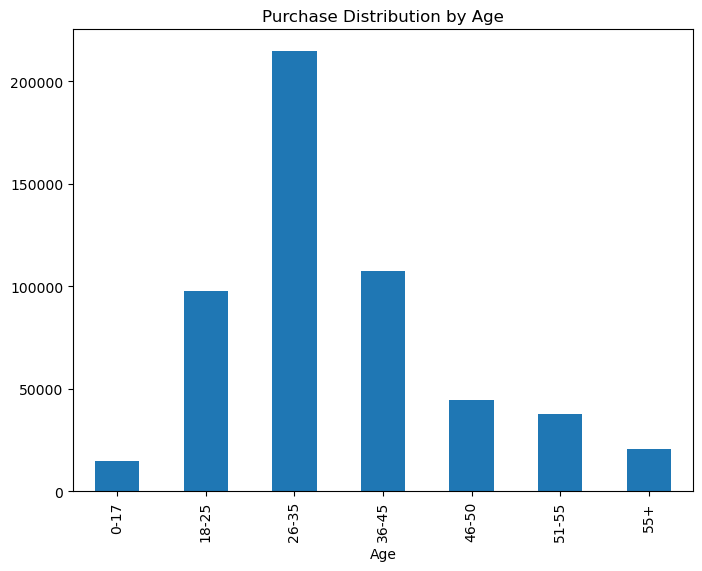

In [24]:
df.groupby('Age').size().plot(kind= 'bar', figsize=(8, 6), title='Purchase Distribution by Age')

In [7]:
# naive approach

for i in df['Age'].unique():
    print(i, ":", len(df[df['Age']==i]))

0-17 : 14707
55+ : 20903
26-35 : 214690
46-50 : 44526
51-55 : 37618
36-45 : 107499
18-25 : 97634


In [13]:
# Number of unique Products that are bought by people age btw 18-25

df[df['Age'] == i]['Product_ID'].nunique()

3213

In [18]:
# number of unique products purchased by each age-group

for i in df['Age'].unique():
    print(i,":", df[df['Age'] == i]['Product_ID'].nunique())

0-17 : 2300
55+ : 2573
26-35 : 3419
46-50 : 3099
51-55 : 2877
36-45 : 3318
18-25 : 3213


In [20]:
lst = []
for i in df['Age'].unique():
    lst.append([i, df[df['Age'] == i]['Product_ID'].nunique()])
    
    
data= pd.DataFrame(lst, columns = ['Age', 'Products'])
data

,Age,Products
0,0-17,2300
1,55+,2573
2,26-35,3419
3,46-50,3099
4,51-55,2877
5,36-45,3318
6,18-25,3213


<AxesSubplot:xlabel='Age'>

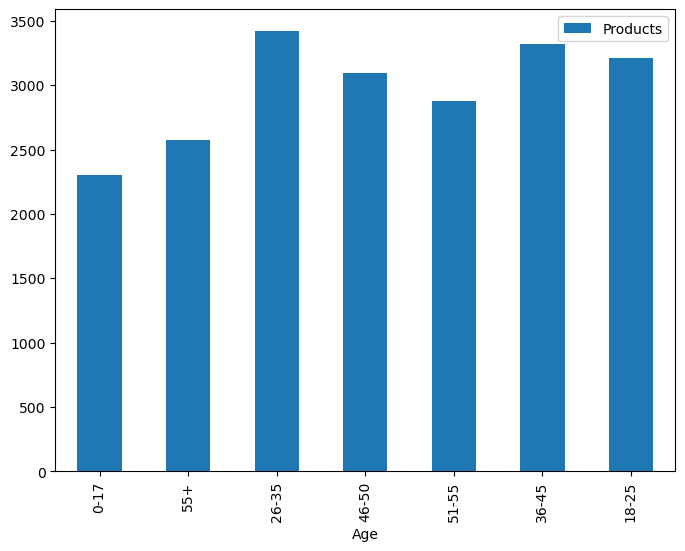

In [23]:
data.plot.bar(x= 'Age', figsize=(8,6))

### How many amount people are spending

<AxesSubplot:title={'center':'Amount Spend by Age'}, xlabel='Age'>

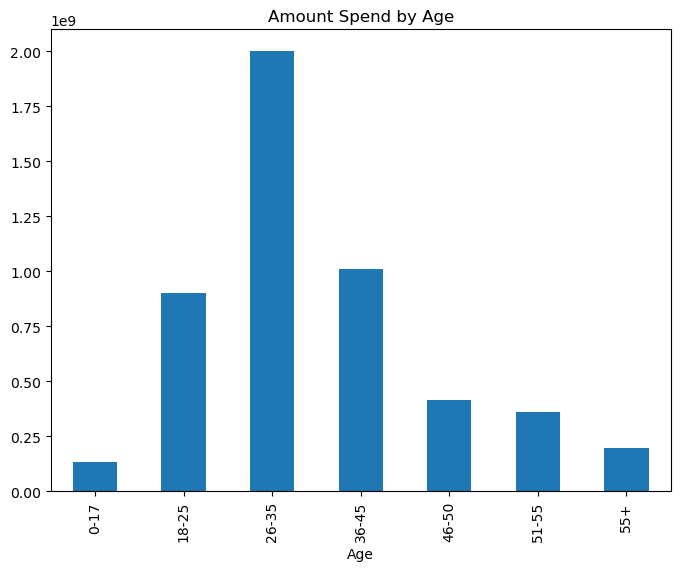

In [26]:
df.groupby('Age').sum()['Purchase'].plot(kind= 'bar', figsize=(8, 6), title='Amount Spend by Age')

<AxesSubplot:title={'center':'Average amount Spend by Age'}, ylabel='Purchase'>

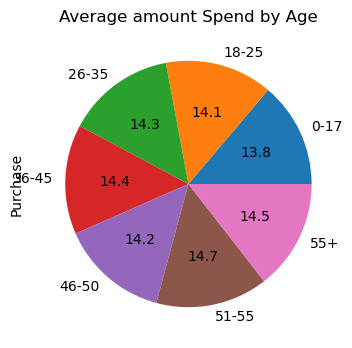

In [32]:
df.groupby('Age').mean()['Purchase'].plot(kind= 'pie',autopct='%0.1f', figsize=(4, 4), title='Average amount Spend by Age')

### Based on Marital Status

<AxesSubplot:title={'center':'Amount Spend by Marital Status'}, ylabel='0 - Unmarried, 1 - Married'>

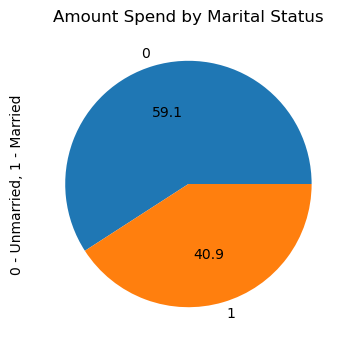

In [38]:
df.groupby('Marital_Status').size().plot(kind= 'pie', figsize=(4, 4), title='Amount Spend by Marital Status',autopct='%0.1f', 
                                         ylabel='0 - Unmarried, 1 - Married')

<AxesSubplot:title={'center':'Amount Spend by Marital Status'}, ylabel='Gender-wise Sale'>

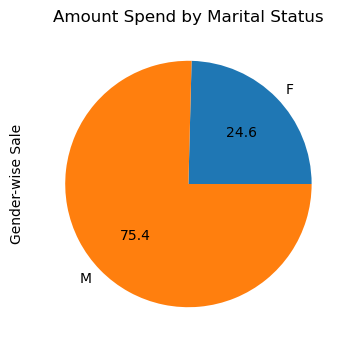

In [39]:
df.groupby('Gender').size().plot(kind= 'pie', figsize=(4, 4), title='Amount Spend by Marital Status', autopct='%0.1f',
                                         ylabel='Gender-wise Sale')